In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [50]:
# Je cherche à me débarasser des messages de warning qui encombrent mon notebook
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

 Les déterminants du choix de contraception en Indonésie
---------------------------------------------------------------------

#### Présentation littéraire
Selon de récentes estimations, l'Indonésie a une population d'environ 255 millions d'habitants. Petit à petit elle voit grâce à l'intervention de son gouvernement son taux de fertilité diminuait jusqu'à atteindre en 2013 2.3 naissances par femme. Il est donc intéressant de voir les effets en pratique de sa politique et ses traductions dans le choix de contraception des femmes.

#### Présentation technique

Il s'agit d'un problème de classification multiclasse puisque la variable à prédire a trois modalités. Une spécificté plus particulière de notre jeu de données est de ne contenir quasiment que des variables catégorielles (7/9) ce qui modifie sensiblement notre approche, notamment dans la première partie de l'étude. Le déroulement de l'analyse est organisé en deux grandes parties, l'une reposant sur une description statistiques des données et l'autre sur un 

<h1 id="tocheading">Table des matières</h1>
<div id="toc"></div>

In [135]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

## Récupération des données

Je cherche dans cette partie à avoir les instruments pour pouvoir commencer l'analyse.

Ainsi je récupère les données ainsi que leur présentation afin de ne pas avoir à recopier les indications.

Dans un deuxième temps je les partitionne en trois tables : celle contenant et les données et la variable à prédire (df), celle ne contenant que les données (data), et celle contenant que la variable à prédire (y).

Par ailleurs pour pouvoir documenter au mieux mes résultats, je crée un vecteur avec les intitulés des modalités de la variable à prédire afin de les ajouter sur les graphiques (y_names).

#### Importation de la présentation des données sur UCI

In [3]:
import requests
presentation = "https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.names"
f = requests.get(presentation)

print (f.text)


1. Title: Contraceptive Method Choice

2. Sources:
   (a) Origin:  This dataset is a subset of the 1987 National Indonesia
                Contraceptive Prevalence Survey
   (b) Creator: Tjen-Sien Lim (limt@stat.wisc.edu)
   (c) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
   (c) Date:    June 7, 1997

3. Past Usage:
   Lim, T.-S., Loh, W.-Y. & Shih, Y.-S. (1999). A Comparison of
   Prediction Accuracy, Complexity, and Training Time of Thirty-three
   Old and New Classification Algorithms. Machine Learning. Forthcoming.
   (ftp://ftp.stat.wisc.edu/pub/loh/treeprogs/quest1.7/mach1317.pdf or
   (http://www.stat.wisc.edu/~limt/mach1317.pdf)

4. Relevant Information:
   This dataset is a subset of the 1987 National Indonesia Contraceptive
   Prevalence Survey. The samples are married women who were either not 
   pregnant or do not know if they were at the time of interview. The 
   problem is to predict the current contraceptive method choice 
   (no use, long-term methods, or short-term m

#### Importation des données

In [5]:
import pandas, urllib.request
furl = urllib.request.urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data")
df = pandas.read_csv(furl, names=["Age", "Educ", "Educ mari","Nbr Enfant","Religion","Statut trav","Statut mari","Niveau de vie","Exp Media","Contraception"])
print(df.head())
print(df.shape) 
# nous avons donc 1473 observations et 10 variables comme indiqué en introduction
 

   Age  Educ  Educ mari  Nbr Enfant  Religion  Statut trav  Statut mari  \
0   24     2          3           3         1            1            2   
1   45     1          3          10         1            1            3   
2   43     2          3           7         1            1            3   
3   42     3          2           9         1            1            3   
4   36     3          3           8         1            1            3   

   Niveau de vie  Exp Media  Contraception  
0              3          0              1  
1              4          0              1  
2              4          0              1  
3              3          0              1  
4              2          0              1  
(1473, 10)


In [6]:
#Création de trois tables et un vecteur : data y df y_names
copy= df.copy() #je ne veux pas écraser ma table d'entrée puisque je pourrais encore en avoir besoin
y= copy.pop('Contraception')# je ne récupère que la variable d'intérêt
print(y.shape)
data = copy# je récupère les autres colonnes qui restent soit les variables de prédiction
print(data.head())
print(data.shape)
y_names=["","No-Use","Long-Term","Short-Term"]# je garde en mémoire la signification des modalités de y pour pouvoir lire aisément la siginification des tableaux en sortie
print(y_names)


(1473,)
   Age  Educ  Educ mari  Nbr Enfant  Religion  Statut trav  Statut mari  \
0   24     2          3           3         1            1            2   
1   45     1          3          10         1            1            3   
2   43     2          3           7         1            1            3   
3   42     3          2           9         1            1            3   
4   36     3          3           8         1            1            3   

   Niveau de vie  Exp Media  
0              3          0  
1              4          0  
2              4          0  
3              3          0  
4              2          0  
(1473, 9)
['', 'No-Use', 'Long-Term', 'Short-Term']


## Première approche: les statistiques descriptives

On cherche dans cette partie à avoir une première appréhension des données grâce à des outils standards de statistiques.

### Représentation de la répartition des variables

#### Les variables explicatives: traitement du dataframe "data"

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x05D59DF0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x06690350>]], dtype=object)

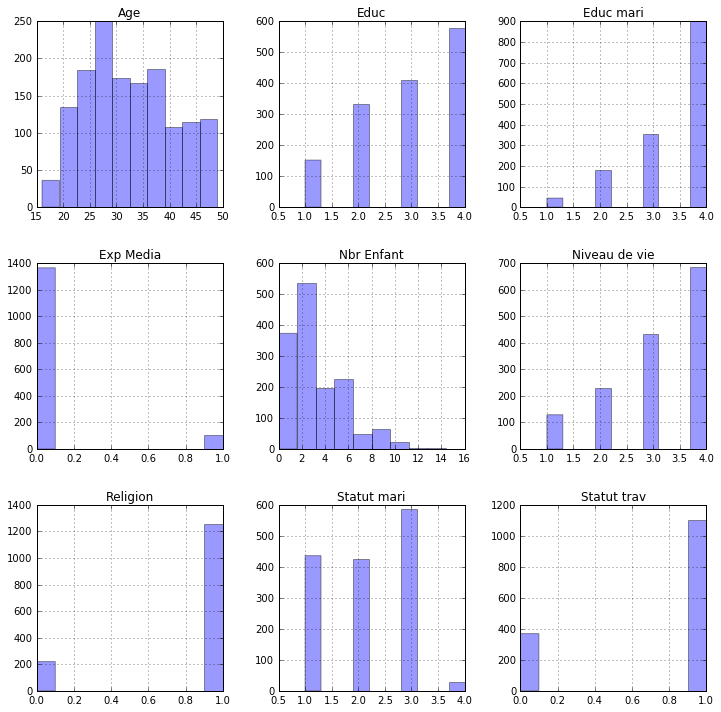

In [7]:
data.hist(figsize=(12,12), alpha=0.40 )
#comme la plupart des variables sont des variables catégorielles 
# il est d'autant plus pertinent de ne choisir que la représentation en histogramme

#### La variable à expliquer : traitement de y

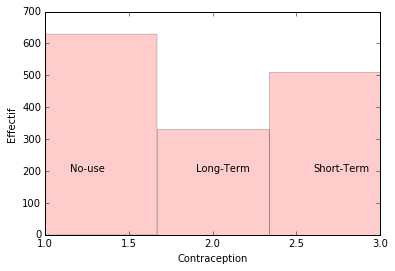

In [8]:
plt.hist(y, 3, facecolor='red',alpha=0.20, ) 
plt.xlabel('Contraception')
plt.ylabel('Effectif')
plt.annotate('No-use', xy=(1.5, 200), xytext=(1.15, 200))
plt.annotate('Long-Term', xy=(1.5,200), xytext=(1.9, 200))
plt.annotate('Short-Term', xy=(3,200), xytext=(2.6, 200))
plt.figure()


Nous cherchons par ailleurs pour la suite à savoir si une des modalités est bien moins fréquente que les autres ce qui pourrait fausser l'analyse de classification.

In [9]:
print(df.Contraception.value_counts()) 
# Nous sommes rassurés d'autant plus que la modalité la plus importante est le non-use.
# Or d'un point de vue sociétal c'est sur celle-là qu'une politique publique peut vouloir jouer

1    629
3    511
2    333
Name: Contraception, dtype: int64


### Étude des interactions entre les variables

Nous sommmes en présence d'un jeu de données contenant majoritairement des variables catégorielles (8/10) ce qui nous empêche de mener une étude des corrélations, pourtant très commode pour avoir une vue synthétique des relations entre nos variables. Nous allons donc procéder ainsi: d'abord visualiser toutes les variables deux à deux pour comprendre leur covariation puis nous allons chercher un subsitut d'une analyse en composante prinicpales et enfin nous allons nous concentrer plus spécifiquement sur notre variable d'intérêt soit la contraception.


#### Entre toutes les variables : Pairplot

Nous utilisons dans cette partie délibérement des graphes qui permettent de présenter les résultats de façon synthétique vu le grand nombre de variables à comparer.

C:\Users\Edith\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


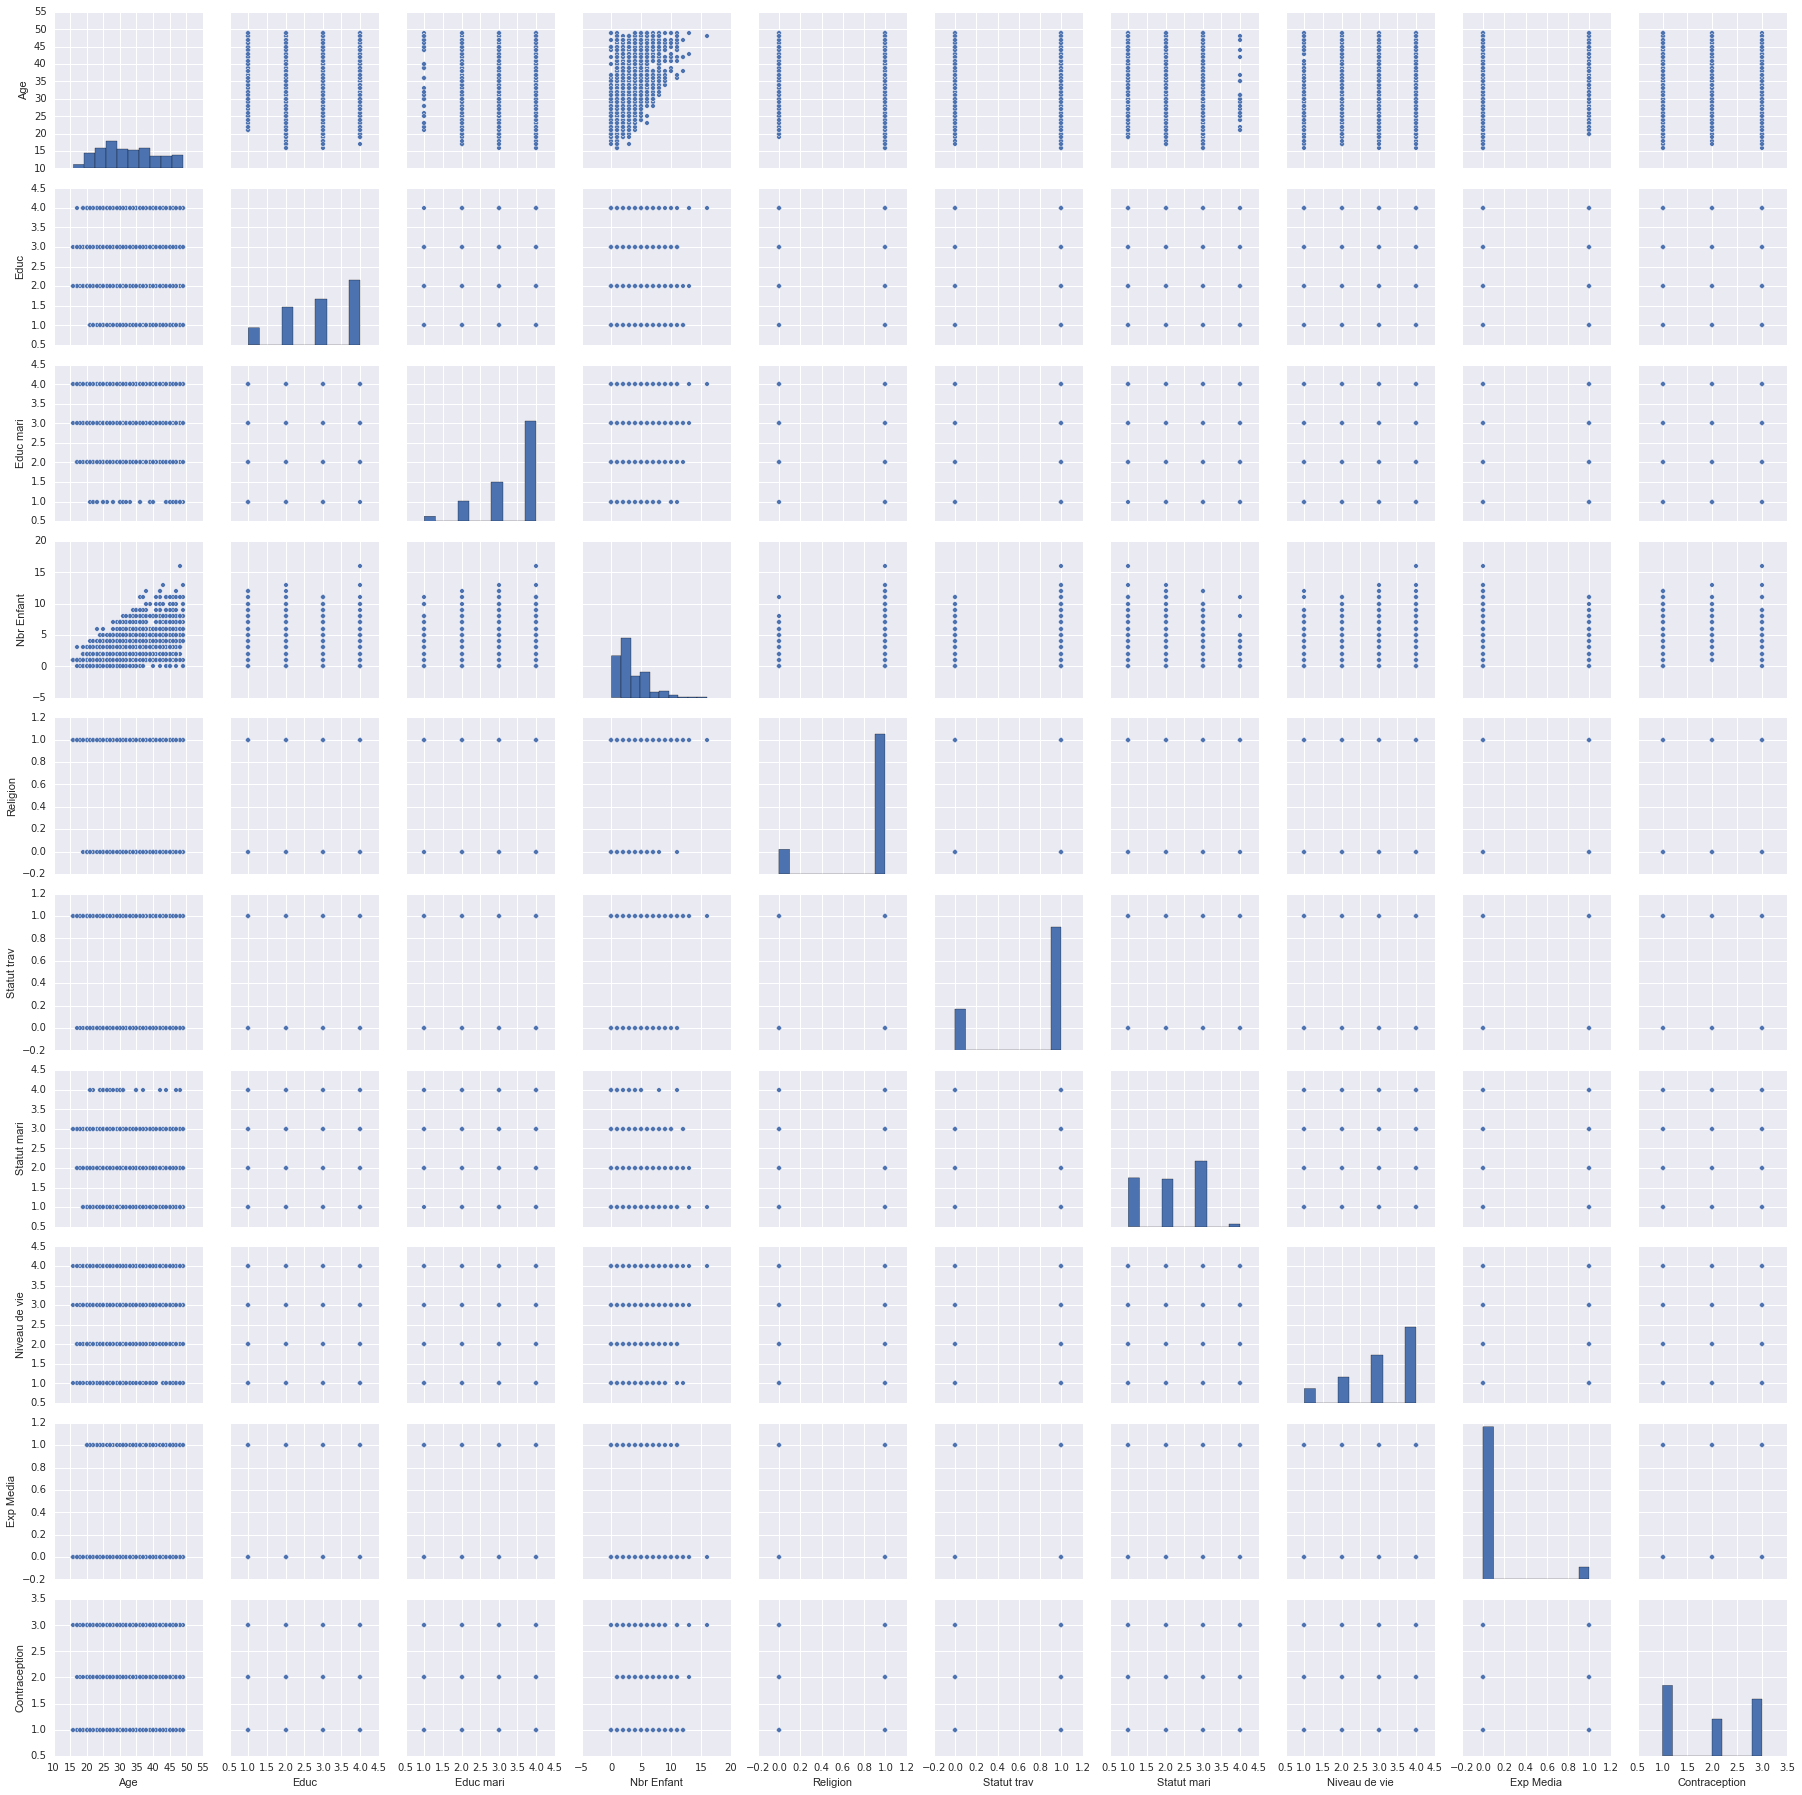

In [51]:
# Une vision en une multitude de graphe représentant les variables deux à deux
import seaborn
seaborn.pairplot(df)
# Cependant le fait que nos variables explicatives sont surtout des données catégorielles 
#  réduit le potentiel explicatif d'un tel graphique

#### Entre toutes les variables : ACM
Nous cherchons un graphique qui serait plus parlant. Vu le nombre de variable catégorielles, nous pensons à effectuer une analsye des correspondances multiples. Malheureusement il n'y a pas de modules évidents pour pouvoir en effectuer une. Nous sommes donc aller prendre le code source de Emre Safak sur Github. Il faut dans un second temps aussi transformer toutes nos variables en variables binaires pour pouvoir appliquer une acm

In [11]:
#de l'art du copier/coller
from scipy.linalg import diagsvd
import numpy as np
import pandas as pd
import functools


def process_df(DF, cols, ncols):
    if cols:  # if you want us to do the dummy coding
        K = len(cols)  # the number of categories
        X = dummy(DF, cols)
    else:  # if you want to dummy code it yourself or do all the cols
        K = ncols
        if ncols is None:  # be sure to pass K if you didn't multi-index
            K = len(DF.columns)  # ... it with mca.dummy()
            if not K:
                raise ValueError("Your DataFrame has no columns.")
        elif not isinstance(ncols, int) or ncols <= 0 or \
                        ncols > len(DF.columns):  # if you dummy coded it yourself
            raise ValueError("You must pass a valid number of columns.")
        X = DF
    J = X.shape[1]
    return X, K, J


def dummy(DF, cols=None):
    """Dummy code select columns of a DataFrame."""
    return pd.concat((pd.get_dummies(DF[col])
        for col in (DF.columns if cols is None else cols)),
        axis=1, keys=DF.columns)


def _mul(*args):
    """An internal method to multiply matrices."""
    return functools.reduce(np.dot, args)


class MCA(object):
    """Run MCA on selected columns of a pd DataFrame.
    
    If the column are specified, assume that they hold
    categorical variables that need to be replaced with
    dummy indicators, otherwise process the DataFrame as is.
    'cols': The columns of the DataFrame to process.
    'ncols': The number of columns before dummy coding. To be passed if cols isn't.
    'benzecri': Perform Benzécri correction (default: True)
    'TOL': value below which to round eigenvalues to zero (default: 1e-4)
    """

    def __init__(self, DF, cols=None, ncols=None, benzecri=True, TOL=1e-4):

        X, self.K, self.J = process_df(DF, cols, ncols)
        S = X.sum().sum()
        Z = X / S  # correspondence matrix
        self.r = Z.sum(axis=1)
        self.c = Z.sum()
        self._numitems = len(DF)
        self.cor = benzecri
        self.D_r = np.diag(1/np.sqrt(self.r))
        Z_c = Z - np.outer(self.r, self.c)  # standardized residuals matrix
        self.D_c = np.diag(1/np.sqrt(self.c))

        # another option, not pursued here, is sklearn.decomposition.TruncatedSVD
        self.P, self.s, self.Q = np.linalg.svd(_mul(self.D_r, Z_c, self.D_c))

        self.E = None
        E = self._benzecri() if self.cor else self.s**2
        self.inertia = sum(E)
        self.rank = np.argmax(E < TOL)
        self.L = E[:self.rank]

    def _benzecri(self):
        if self.E is None:
            self.E = np.array([(self.K/(self.K-1.)*(_ - 1./self.K))**2
                              if _ > 1./self.K else 0 for _ in self.s**2])
        return self.E

    def fs_r(self, percent=0.9, N=None):
        """Get the row factor scores (dimensionality-reduced representation),
        choosing how many factors to retain, directly or based on the explained
        variance.
        'percent': The minimum variance that the retained factors are required
                                to explain (default: 90% = 0.9)
        'N': The number of factors to retain. Overrides 'percent'.
                If the rank is less than N, N is ignored.
        """
        if not 0 <= percent <= 1:
                raise ValueError("Percent should be a real number between 0 and 1.")
        if N:
                if not isinstance(N, (int, np.int64)) or N <= 0:
                        raise ValueError("N should be a positive integer.")
                N = min(N, self.rank)
                # S = np.zeros((self._numitems, N))
        # else:
        self.k = 1 + np.flatnonzero(np.cumsum(self.L) >= sum(self.L)*percent)[0]
        #  S = np.zeros((self._numitems, self.k))
        # the sign of the square root can be either way; singular value vs. eigenvalue
        # np.fill_diagonal(S, -np.sqrt(self.E) if self.cor else self.s)
        num2ret = N if N else self.k
        s = -np.sqrt(self.L) if self.cor else self.s
        S = diagsvd(s[:num2ret], self._numitems, num2ret)
        self.F = _mul(self.D_r, self.P, S)
        return self.F

    def fs_c(self, percent=0.9, N=None):
        """Get the column factor scores (dimensionality-reduced representation),
        choosing how many factors to retain, directly or based on the explained
        variance.
        'percent': The minimum variance that the retained factors are required
                                to explain (default: 90% = 0.9)
        'N': The number of factors to retain. Overrides 'percent'.
                If the rank is less than N, N is ignored.
        """
        if not 0 <= percent <= 1:
                raise ValueError("Percent should be a real number between 0 and 1.")
        if N:
                if not isinstance(N, (int, np.int64)) or N <= 0:
                        raise ValueError("N should be a positive integer.")
                N = min(N, self.rank)  # maybe we should notify the user?
                # S = np.zeros((self._numitems, N))
        # else:
        self.k = 1 + np.flatnonzero(np.cumsum(self.L) >= sum(self.L)*percent)[0]
        #  S = np.zeros((self._numitems, self.k))
        # the sign of the square root can be either way; singular value vs. eigenvalue
        # np.fill_diagonal(S, -np.sqrt(self.E) if self.cor else self.s)
        num2ret = N if N else self.k
        s = -np.sqrt(self.L) if self.cor else self.s
        S = diagsvd(s[:num2ret], len(self.Q), num2ret)
        self.G = _mul(self.D_c, self.Q.T, S)  # important! note the transpose on Q
        return self.G

    def cos_r(self, N=None):  # percent=0.9
        """Return the squared cosines for each row."""

        if not hasattr(self, 'F') or self.F.shape[1] < self.rank:
                self.fs_r(N=self.rank)  # generate F
        self.dr = np.linalg.norm(self.F, axis=1)**2
        # cheaper than np.diag(self.F.dot(self.F.T))?

        return np.apply_along_axis(lambda _: _/self.dr, 0, self.F[:, :N]**2)

    def cos_c(self, N=None):  # percent=0.9,
        """Return the squared cosines for each column."""

        if not hasattr(self, 'G') or self.G.shape[1] < self.rank:
                self.fs_c(N=self.rank)  # generate
        self.dc = np.linalg.norm(self.G, axis=1)**2
        # cheaper than np.diag(self.G.dot(self.G.T))?

        return np.apply_along_axis(lambda _: _/self.dc, 0, self.G[:, :N]**2)

    def cont_r(self, percent=0.9, N=None):
        """Return the contribution of each row."""

        if not hasattr(self, 'F'):
            self.fs_r(N=self.rank)  # generate F
        return np.apply_along_axis(lambda _: _/self.L[:N], 1,
                np.apply_along_axis(lambda _: _*self.r, 0, self.F[:, :N]**2))

    def cont_c(self, percent=0.9, N=None):  # bug? check axis number 0 vs 1 here
        """Return the contribution of each column."""

        if not hasattr(self, 'G'):
            self.fs_c(N=self.rank)  # generate G
        return np.apply_along_axis(lambda _: _/self.L[:N], 1,
                np.apply_along_axis(lambda _: _*self.c, 0, self.G[:, :N]**2))

    def expl_var(self, greenacre=True, N=None):
        """
        Return proportion of explained inertia (variance) for each factor.
        :param greenacre: Perform Greenacre correction (default: True)
        """
        if greenacre:
            greenacre_inertia = (self.K / (self.K - 1.) * (sum(self.s**4)
                                 - (self.J - self.K) / self.K**2.))
            return (self._benzecri() / greenacre_inertia)[:N]
        else:
            E = self._benzecri() if self.cor else self.s**2
            return (E / sum(E))[:N]

    def fs_r_sup(self, DF, N=None):
        """Find the supplementary row factor scores.
        ncols: The number of singular vectors to retain.
        If both are passed, cols is given preference.
        """
        if not hasattr(self, 'G'):
            self.fs_c(N=self.rank)  # generate G

        if N and (not isinstance(N, int) or N <= 0):
                raise ValueError("ncols should be a positive integer.")
        s = -np.sqrt(self.E) if self.cor else self.s
        N = min(N, self.rank) if N else self.rank
        S_inv = diagsvd(-1/s[:N], len(self.G.T), N)
        # S = scipy.linalg.diagsvd(s[:N], len(self.tau), N)
        return _mul(DF.div(DF.sum(axis=1), axis=0), self.G, S_inv)[:, :N]

    def fs_c_sup(self, DF, N=None):
        """Find the supplementary column factor scores.
        ncols: The number of singular vectors to retain.
        If both are passed, cols is given preference.
        """
        if not hasattr(self, 'F'):
            self.fs_r(N=self.rank)  # generate F

        if N and (not isinstance(N, int) or N <= 0):
                raise ValueError("ncols should be a positive integer.")
        s = -np.sqrt(self.E) if self.cor else self.s
        N = min(N, self.rank) if N else self.rank
        S_inv = diagsvd(-1/s[:N], len(self.F.T), N)
        # S = scipy.linalg.diagsvd(s[:N], len(self.tau), N)
        return _mul((DF/DF.sum()).T, self.F, S_inv)[:, :N]
    


In [12]:
# Discrétisation de la table df : création de dfdis
dfdis = df.copy()
dfdis["Nbr Enfant"]=pandas.qcut(dfdis["Nbr Enfant"],3,labels=["Enf1","Enf2","Enf3"])
dfdis["Age"]= pandas.qcut(dfdis["Age"],3,labels=["Age1","Age2","Age3"])
dfdis.head()
 


,Age,Educ,Educ mari,Nbr Enfant,Religion,Statut trav,Statut mari,Niveau de vie,Exp Media,Contraception
0,Age1,2,3,Enf2,1,1,2,3,0,1
1,Age3,1,3,Enf3,1,1,3,4,0,1
2,Age3,2,3,Enf3,1,1,3,4,0,1
3,Age3,3,2,Enf3,1,1,3,3,0,1
4,Age2,3,3,Enf3,1,1,3,2,0,1


In [13]:
# Transformation des variables en dummies : création de la table dc
totdis=dfdis.copy()
totdis["Educ"]=pandas.Categorical(totdis["Educ"],ordered=False)
totdis["Educ"]=totdis["Educ"].cat.rename_categories(["Ed1","Ed2","Ed3","Ed4"])
totdis["Educ mari"]=pandas.Categorical(totdis["Educ mari"],ordered=False)
totdis["Educ mari"]=totdis["Educ mari"].cat.rename_categories(["Edm1","Edm2","Edm3","Edm4"])
totdis["Statut mari"]=pandas.Categorical(totdis["Statut mari"],ordered=False)
totdis["Statut mari"]=totdis["Statut mari"].cat.rename_categories(["St1","St2","St3","St4"])
totdis["Niveau de vie"]=pandas.Categorical(totdis["Niveau de vie"],ordered=False)
totdis["Niveau de vie"]=totdis["Niveau de vie"].cat.rename_categories(["Nv1","Nv2","Nv3","Nv4"])
totdis["Contraception"]=pandas.Categorical(totdis["Contraception"],ordered=False)
totdis["Contraception"]=totdis["Contraception"].cat.rename_categories(["Ctr1","Ctr2","Ctr3"])

dc=pandas.DataFrame(pandas.get_dummies(totdis[["Age","Nbr Enfant", "Educ","Educ mari","Statut mari","Niveau de vie","Exp Media","Religion","Statut trav","Contraception"]]))

dc.head()

,Exp Media,Religion,Statut trav,Age_Age1,Age_Age2,Age_Age3,Nbr Enfant_Enf1,Nbr Enfant_Enf2,Nbr Enfant_Enf3,Educ_Ed1,...,Statut mari_St2,Statut mari_St3,Statut mari_St4,Niveau de vie_Nv1,Niveau de vie_Nv2,Niveau de vie_Nv3,Niveau de vie_Nv4,Contraception_Ctr1,Contraception_Ctr2,Contraception_Ctr3
0,0,1,1,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
1,0,1,1,0,0,1,0,0,1,1,...,0,1,0,0,0,0,1,1,0,0
2,0,1,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,1,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
4,0,1,1,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [14]:
# Création de la table des variations explicatives discrétisées : datadis

copy= dc.copy() #je ne veux pas écraser ma table d'entrée puisque je pourrais encore en avoir besoin
datadis=copy.drop(["Contraception_Ctr1","Contraception_Ctr2", "Contraception_Ctr3"], axis=1)
print(datadis.shape)
print(dc.shape)

(1473, 25)
(1473, 28)


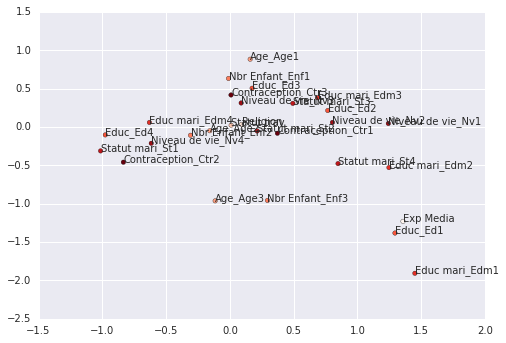

In [15]:
# Exécution de l'ACM
mca_dc=MCA(dc,benzecri=False)
col=[1,2,3,4,4,4,5,5,5,6,6,6,6,7,7,7,7,8,8,8,8,9,9,9,9,10,10,10]
plt.scatter(mca_dc.fs_c()[:, 0],mca_dc.fs_c()[:, 1],c=col, cmap=plt.cm.Reds)
for i, j, nom in zip(mca_dc.fs_c()[:, 0],
    mca_dc.fs_c()[:, 1], dc.columns):
    plt.text(i, j, nom)
   
    
    
show()

Je reconnais que l'ACM n'est pas facilement visible, le seul changement que j'ai réussi à faire : la couleur des points. Je n'ai pas trouvé comment l'agrandir. On remarque surtout les instances qui n'ont pas beaucoup d'impact sur la contraception quelle qu'elle soit : le grand nbr d'enfant, un âge important, éducation faible du mari et de la femme, une exposition nulle au média.

Cela nous encourage à aller regarder de plus près l'intéraction de notre variable d'intérêt avec les autres pour voir quels sont les facteurs d'influence.

#### Entre notre variable d'intérêt et les autres : test du chi2

On cherche dans un premier temps grâce au test du chi2, à savoir si toutes les variables socio-démographiques à notre disposition ont un impact sur le choix de contraception. On teste donc à partir des tableaux de contingence l'hypothèse nulle que chacune des catégories prises séparément n'influence pas la contraception, i.e on teste l'indépendance entre les variables


In [16]:
import scipy # on ne l'étudie que sur les variables catégorielles
for i in (list(data.T.index[1:3,])): 
    u=pandas.crosstab(df.Contraception, df[i])
    print(u)
    print(scipy.stats.chi2_contingency(u))

for i in (list(data.T.index[4::,])):
    u=pandas.crosstab(df.Contraception, df[i])
    print(u)
    print(scipy.stats.chi2_contingency(u))


Educ             1    2    3    4
Contraception                    
1              103  176  175  175
2                9   37   80  207
3               40  121  155  195
(140.45892081146863, 8.0187704575255277e-28, 6, array([[  64.90699253,  142.6245757 ,  175.07807196,  246.39035981],
       [  34.36252546,   75.50712831,   92.68839104,  130.44195519],
       [  52.73048201,  115.86829599,  142.233537  ,  200.167685  ]]))
Educ mari       1   2    3    4
Contraception                  
1              31  99  161  338
2              10  16   50  257
3               3  63  141  304
(73.952794954266295, 6.3045366741787992e-14, 6, array([[  18.78886626,   76.00950441,  150.31093007,  383.89069925],
       [   9.94704684,   40.24032587,   79.57637475,  203.23625255],
       [  15.2640869 ,   61.75016972,  122.11269518,  311.8730482 ]]))
Religion        0    1
Contraception         
1              75  554
2              76  257
3              69  442
(21.621920026173601, 2.0177145336361039e-

#### Entre notre variable d'intérêt et les autres : histogramme conditionnel

Nous utilisons une fonction de seaborn qui permet de représenter sous forme d'histogramme les tableaux de contingence. On peut donc comparer la structure de l'histogramme de chaque modalité des variables explicatives organisé selon la contraception.

Détail technique: J'aurais souhaiter obtenir cette représentation selon chaque variable plotée dans un même gaphe pour avoir une vue panoramique. Cependant que ce soit avec la commande subplot de matplotlib ou Facetgrid de seaborn j'ai pas réussi. Je présente donc ici juste deux variables: l'exposition au média et le nombre d'enfants.

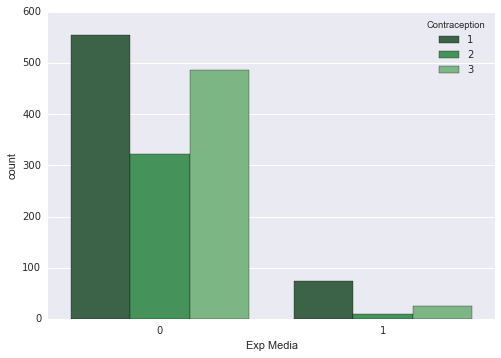

In [17]:
#L'exposition au média
seaborn.countplot(x="Exp Media", hue="Contraception", data=df, palette='Greens_d')

,Age,Educ,Educ mari,Nbr Enfant,Religion,Statut trav,Statut mari,Niveau de vie,Exp Media,Contraception
0,24,2,3,"(2, 3]",1,1,2,3,0,1
1,45,1,3,"(5, 16]",1,1,3,4,0,1
2,43,2,3,"(5, 16]",1,1,3,4,0,1
3,42,3,2,"(5, 16]",1,1,3,3,0,1
4,36,3,3,"(5, 16]",1,1,3,2,0,1


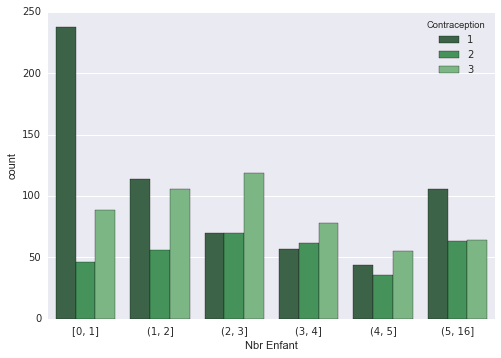

In [18]:
# Le nombre d'enfant 
u = df.copy() # Il faut d'abord la discrétiser
u["Nbr Enfant"]= pandas.qcut(u["Nbr Enfant"],6)# le choix du nombre de catégories s'est effectuée selon l'allure de l'histogramme préenté au début
# Nous choisission délibérément qcut parce que proche de la distribution initiale du fait la prise en compte des quantiles

seaborn.countplot(x="Nbr Enfant", hue="Contraception", data=u, palette='Greens_d')

u.head()


Ainsi on peut en déduire que le potentiel explicatif de Exp Media est moins important que celui de Nbr Enf car la distribution selon le mode de contraception a la même structure selon chacune des modalités de Exp médi alors qu'elle différe beaucoup suivant le nbr d'enfants.

## Seconde approche : machine learning et supervised classification

### Grand balayage : Decision Tree, AdaBoost et GaussianNB

#### Decisition Tree

In [88]:
from sklearn.cross_validation import train_test_split
data_train, data_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42)
df.shape, data_test.shape, y_test.shape


((1473, 10), (487, 9), (487,))

In [123]:
import timeit
tic=timeit.default_timer()
from sklearn import tree
DecTree = tree.DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=10)
DecTree.fit(data_train, y_train)
y_predDec = DecTree.fit(data_train, y_train).predict(data_test)
toc=timeit.default_timer()
toc - tic 

0.028215771228843778

Matrice de confusion
[[125  31  50]
 [ 32  48  40]
 [ 46  33  82]]


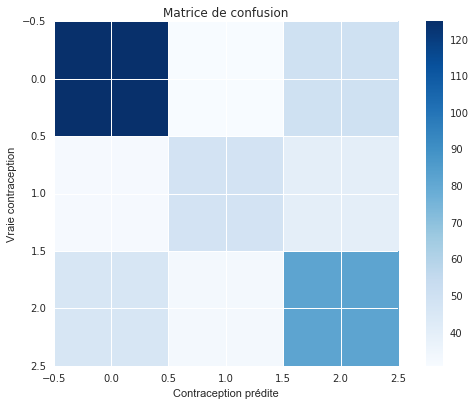

f1Dec 0.52333333495


In [89]:
from sklearn.metrics import confusion_matrix, f1_score
def plot_confusion_matrix(cm, title='Matrice de confusion', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('Vraie contraception')
    plt.xlabel('Contraception prédite')
    

# Compute confusion matrix
cm = confusion_matrix(y_test, y_predDec)
np.set_printoptions(precision=2)
print('Matrice de confusion')
print(cm)
plt.figure()
plot_confusion_matrix(cm)
    
plt.show()
f1Dec = f1_score(y_test, y_predDec)
print('f1Dec',f1Dec)

#### AdaBoost

In [121]:
#Application avec 800 estimateurs et temps de calcul
#Il est intéressant pour AdaBoost de voir le temps mis car c'est un modèle qui met du temps à tourner sur mon jeu de données
import timeit
tic=timeit.default_timer()

from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier(DecTree,
                         algorithm='SAMME',
                         n_estimators=800,
                         learning_rate=0.5)
y_predAda= AdaBoost.fit(data_train, y_train).predict(data_test)

toc=timeit.default_timer()
toc - tic 

4.866757868965106

Matrice de confusion
[[127  25  54]
 [ 28  39  53]
 [ 45  27  89]]
f1Ada 0.520557590694


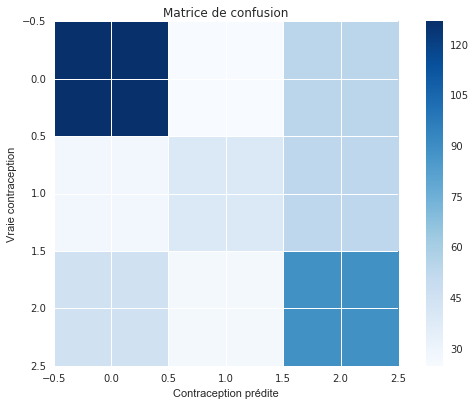

In [120]:
# AdaBoost : performance de prédiction
cm = confusion_matrix(y_test, y_predAda)
np.set_printoptions(precision=2)
print('Matrice de confusion')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

f1Ada = f1_score(y_test, y_predAda)
print('f1Ada',f1Ada)

Remarque: l'Adaboost est un modèle qui est vraiment plus lent à faire tourner

#### GaussianNB

In [129]:
tic=timeit.default_timer()
from sklearn.naive_bayes import GaussianNB
Gaussian = GaussianNB()
y_predGaus= Gaussian.fit(data_train, y_train).predict(data_test)

toc=timeit.default_timer()
toc - tic 

0.006243010657499326

Matrice de confusion
[[86 53 67]
 [16 63 41]
 [43 40 78]]
f1Gaus 0.468396059753


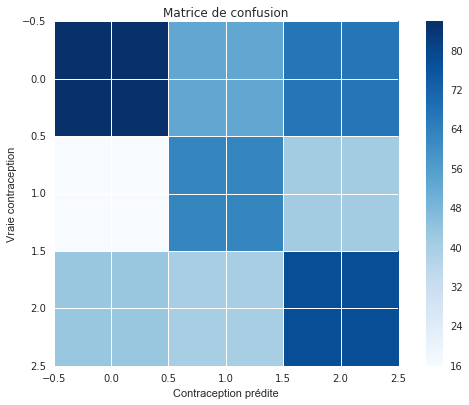

In [55]:
cm = confusion_matrix(y_test, y_predGaus)
np.set_printoptions(precision=2)
print('Matrice de confusion')
print(cm)
plt.figure()
plot_confusion_matrix(cm)
f1Gaus = f1_score(y_test, y_predGaus)
print('f1Gaus',f1Gaus)


In [56]:
l = [ {"Méthode":"DécisionTree", "f1":f1Dec},
         {"Méthode":"AdaBoost", "f1":f1Ada},
         {"Méthode":"Gaussian", "f1":f1Gaus}]
f1=pd.DataFrame(l)
f1

,Méthode,f1
0,DécisionTree,0.523333
1,AdaBoost,0.524810
2,Gaussian,0.468396


### Amélioration 1 : discrétiser les variables prédictives

Pour aller rapidement au résultat nous supprimons la représentation de la matrice de confusion et nous nous limitons à deux classifier, ceux au meilleur score: AdaBoost et DecisionTree

In [57]:
datadis_train, datadis_test, y_train, y_test = train_test_split(datadis, y, test_size=0.33, random_state=42)
df.shape, datadis_test.shape, y_test.shape

((1473, 10), (487, 25), (487,))

#### Decision Tree

In [58]:
from sklearn import tree
DecTree = tree.DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=10)
DecTree.fit(datadis_train, y_train)
y_predDecdis = DecTree.fit(datadis_train, y_train).predict(datadis_test)


In [59]:
cm = confusion_matrix(y_test, y_predDecdis)
np.set_printoptions(precision=2)
print('Matrice de confusion')
print(cm)
f1disDec = f1_score(y_test, y_predDecdis)
print("f1disDec", f1disDec)

Matrice de confusion
[[137  24  45]
 [ 42  34  44]
 [ 62  20  79]]
f1disDec 0.502678030384


#### AdaBoost

In [60]:
y_preddisAda= AdaBoost.fit(datadis_train, y_train).predict(datadis_test)
cm = confusion_matrix(y_test, y_preddisAda)
np.set_printoptions(precision=2)
print('Matrice de confusion')
print(cm)

f1disAda = f1_score(y_test, y_preddisAda)
print('f1disAda',f1disAda)

Matrice de confusion
[[112  34  60]
 [ 45  40  35]
 [ 59  36  66]]
f1disAda 0.445759963036


In [61]:
l = [ {"Données":"Normales", "f1Dec":f1Dec, "f1Ada":f1Ada},
      {"Données":"Discrétisées", "f1Dec":f1disDec, "f1Ada":f1disAda},]
f1=pd.DataFrame(l)
f1 = f1.set_index("Données")
f1

,f1Ada,f1Dec
Données,,
Normales,0.52481,0.523333
Discrétisées,0.44576,0.502678


Les prévisions ne sont pas excellentes : j'essaie donc de voir si ce sont les mêmes femmes qui sont toujours mal regroupées

### Amélioration 2 : spécificité des individus mal prédits

In [62]:
#visulalisation de la contraception mal prédite avec DecisionTree
mismatchesd= (y_predDec != y_test) #liste de booléen avec True si y_pred différent de y_test
mismatchesTd= mismatchesd.copy()
u = mismatchesTd[mismatchesTd==True] #je ne retiens que les y_pred différent
usort = u.index.sort_values() #je prends leurs indices
print(usort[2::])# j'exclue au hasard les deux premiers pour pouvoir avoir des arrays de même taille afin de comparer


Int64Index([  43,   44,   48,   54,   56,   59,   67,   78,   81,   96,
            ...
            1427, 1429, 1433, 1436, 1440, 1455, 1457, 1461, 1466, 1467],
           dtype='int64', length=230)


In [63]:
# Visualisation de la contraception malprédite avec Adaboost
mismatchesa= (y_predAda != y_test)
mismatchesTa= mismatchesa.copy()
v=mismatchesTa[mismatchesTa==True]
vsort= v.index.sort_values()
vsort


Int64Index([  30,   31,   51,   56,   86,   99,  101,  107,  111,  113,
            ...
            1436, 1441, 1452, 1457, 1461, 1463, 1464, 1466, 1467, 1468],
           dtype='int64', length=230)

In [64]:
#On compare les deux sorties
comp = (usort[2::] == vsort)
comp


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

Ainsi on remarque que ce n'est pas un certain groupe de femme qui a tendance à être moins bien prédit

### Amélioration 3 : Utilisation d'autres modèles  et hyperparamètres

Nous utilisons à présent des modèles avec des hyperparamètres qu'il faut tester en premier pour choisir le bon nombre

#### Random forest

Le  paramètre à ajuster en premier dans les méthodes de RandomForest est le nombre d'estimateurs soit le nombre d'arbres dans la forêt. Ici nous n'avons pas a priori un problème de temps de résolution puisque nous n'avons que peu d'observations et de variables. Cependant l'arbitrage se fait tout de même puisque à partir d'un nombre suffisant d'estimateurs, le modèle ne fait que du surajustement. Nous cherchons donc dans un premier temps le nombre optimal d'arbres.

mn_estimators 1 erreur 0.740730410866 1.10161352633
mn_estimators 2 erreur 0.720603758578 1.07806199225
mn_estimators 3 erreur 0.554348474551 1.09413219342
mn_estimators 4 erreur 0.491303684441 1.09787923245
mn_estimators 5 erreur 0.397762504696 1.05203430586
mn_estimators 6 erreur 0.411547320189 1.04518058921
mn_estimators 7 erreur 0.367271613569 1.07806199225
mn_estimators 8 erreur 0.390038225619 1.01831281325
mn_estimators 9 erreur 0.345941406006 1.07996501578


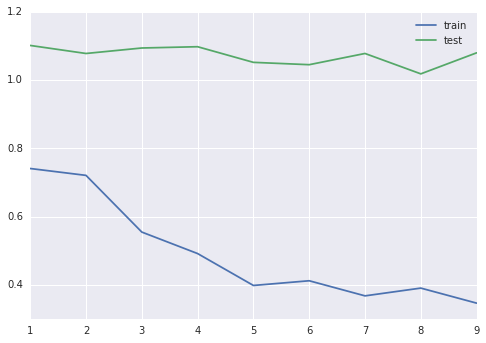

In [65]:
#Étude sur le nombre d'estimateurs
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
curves = []
for n_estimators in range(1,10) :
    clf = RandomForestClassifier(n_estimators=n_estimators, min_samples_leaf=1)
    clf = clf.fit(data_train, y_train)
    erra = mean_squared_error( clf.predict(data_train), y_train)**0.5
    errb = mean_squared_error( clf.predict(data_test), y_test)**0.5
    print("mn_estimators",n_estimators, "erreur",erra,errb)
    curves.append((n_estimators, erra,errb, clf) )
plt.plot ( [c[0] for c in curves], [c[1] for c in curves], label="train")
plt.plot ( [c[0] for c in curves], [c[2] for c in curves], label="test")
plt.legend()

In [125]:
tic=timeit.default_timer()
# Application avec 5 estimateurs
RF= RandomForestClassifier(n_estimators=5,min_samples_leaf=1)
y_predRF= RF.fit(data_train, y_train).predict(data_test)

cm = confusion_matrix(y_test, y_predRF)
np.set_printoptions(precision=2)
print('Matrice de confusion')
print(cm)

f1RF = f1_score(y_test, y_predRF)
print('f1RF',f1RF)
toc=timeit.default_timer()
toc - tic 

Matrice de confusion
[[138  23  45]
 [ 36  39  45]
 [ 55  36  70]]
f1RF 0.500733668641


0.05056290071422609

#### KNeighbors

In [67]:
#Étude sur le nombre de neighbors
from sklearn.neighbors import KNeighborsClassifier
for n_neighbors in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(data_train, y_train)
    y_predNKeigh = clf.predict(data_test)
    print ("KNeighbors(n_neighbors={0})".format(n_neighbors), f1_score(y_test, y_predNKeigh))

KNeighbors(n_neighbors=1) 0.474657813643
KNeighbors(n_neighbors=2) 0.47544617643
KNeighbors(n_neighbors=3) 0.472814771722
KNeighbors(n_neighbors=4) 0.522428057245
KNeighbors(n_neighbors=5) 0.502895129813
KNeighbors(n_neighbors=6) 0.528186932731
KNeighbors(n_neighbors=7) 0.534554914785
KNeighbors(n_neighbors=8) 0.506173600151
KNeighbors(n_neighbors=9) 0.510150016141
KNeighbors(n_neighbors=10) 0.517196263703


In [126]:
tic=timeit.default_timer()
#Application avec n_neighbors = 7
KN = KNeighborsClassifier(n_neighbors=7).fit(data_train, y_train)
y_predKNeigh = KN.predict(data_test)

cm = confusion_matrix(y_test, y_predKNeigh)
np.set_printoptions(precision=2)
print('Matrice de confusion')
print(cm)

f1KNeigh = f1_score(y_test, y_predKNeigh)
print('f1KNeigh',f1KNeigh)

toc=timeit.default_timer()
toc - tic 

Matrice de confusion
[[127  24  55]
 [ 33  44  43]
 [ 49  21  91]]
f1KNeigh 0.534554914785


0.027877010669044466

In [69]:
#Comparaison des résultats
l = [ {"Méthode":"DécisionTree", "f1":f1Dec},
         {"Méthode":"AdaBoost", "f1":f1Ada},
         {"Méthode":"RandomForest", "f1":f1RF},
         {"Méthode":"KNeighbors", "f1":f1KNeigh}
    ]
f1=pd.DataFrame(l)
f1

,Méthode,f1
0,DécisionTree,0.523333
1,AdaBoost,0.524810
2,RandomForest,0.528016
3,KNeighbors,0.534555


### Amélioration 4 : simplifier les catégories de la variable d'intérêt

On remarque que dans les matrices de confusion le fait de ne pas avoir de contraception est à chaque fois mieux prédit. Par ailleurs pour des raisons de politiques publiques on peut penser que le décideur est plus intéressé par le fait de ne pas avoir de contraception afin de mettre des politiques en place. En effet l'enjeu sociétal doit être de maximiser l'utilisation d'un moyen de contraception vs ne pas se protéger.

On se propose donc de regarder la classification suivant deux critères uniquement : avoir une contraception ou ne pas en avoir et donc transformer un problème de classification multi-classe en un de classification binaire. Cela nous permettra donc de pouvoir introduire la notion de courbe ROC valable uniquement pour une variable de prédiction binaire.

In [70]:
# nous créons un nouveau dataframe y_nonuse en regroupant les classes short-term et long-term
y_nonuse = y.copy()
y_nonuse[y_nonuse!=1] = 0 # Utilise une contraception
y_nonuse[y_nonuse==1] = 1 # N'utilise pas de contraception

#### Test sur la nouvelle variable de prédiction

Nous avons choisi de faire tourner les modèles déjà envisagés : DecisionTree, RandomForest, KNeighbors et AdaBoost.

In [71]:
from sklearn.cross_validation import train_test_split
data_train, data_test, y_nutrain, y_nutest = train_test_split(data, y_nonuse, test_size=0.33, random_state=42)
df.shape, data_test.shape, y_nutest.shape

((1473, 10), (487, 9), (487,))

In [97]:
# DecisionTree
y_nupredDec = DecTree.fit(data_train, y_nutrain).predict(data_test)
cm = confusion_matrix(y_nutest, y_nupredDec)
np.set_printoptions(precision=2)
print('Matrice de confusion')
print(cm)


f1nuDec = f1_score(y_nutest, y_nupredDec)
print("f1nuDec", f1nuDec)

Matrice de confusion
[[250  31]
 [ 99 107]]
f1nuDec 0.622093023256


In [73]:
# AdaBoost
y_nupredAda = AdaBoost.fit(data_train, y_nutrain).predict(data_test)
cm = confusion_matrix(y_nutest, y_nupredAda)
np.set_printoptions(precision=2)
print('Matrice de confusion')
print(cm)


f1nuAda = f1_score(y_nutest, y_nupredAda)
print("f1nuAda", f1nuAda)

Matrice de confusion
[[213  68]
 [ 87 119]]
f1nuAda 0.605597964377


In [74]:
#KNeighbors
y_prednuKN= KN.fit(data_train, y_nutrain).predict(data_test)

cm = confusion_matrix(y_nutest, y_prednuKN)
np.set_printoptions(precision=2)
print('Matrice de confusion')
print(cm)

f1nuKN = f1_score(y_nutest, y_prednuKN)
print('f1nuKN',f1nuKN)

Matrice de confusion
[[235  46]
 [112  94]]
f1nuKN 0.543352601156


In [99]:
# RandomForest
y_nupredRF = RF.fit(data_train, y_nutrain).predict(data_test)
cm = confusion_matrix(y_nutest, y_nupredRF)
np.set_printoptions(precision=2)
print('Matrice de confusion')
print(cm)


f1nuRF = f1_score(y_nutest, y_nupredRF)
print("f1nuRF", f1nuRF)

Matrice de confusion
[[204  77]
 [ 83 123]]
f1nuRF 0.605911330049


#### Comparaison des résultats

On met dans un tableau les scores obtenus en classant suivant la variable y (Contraception) à trois modalités (Non-Use, Short-Term, Long-Term) et celle à deux modalités (Use, Non-Use)

In [102]:
#Comparaison des scores
l = [ {"y":"Multiclasse", "DecTree":f1Dec, "AdaBoost":f1Ada, "Kneighbors":f1KNeigh, "RandomForest": f1RF},
      {"y":"Binaire", "DecTree":f1nuDec, "AdaBoost":f1nuAda, "Kneighbors":f1nuKN, "RandomForest":f1nuRF}
        ]
f1=pd.DataFrame(l)
f1 = f1.set_index("y")
f1

,AdaBoost,DecTree,Kneighbors,RandomForest
y,,,,
Multiclasse,0.524810,0.523333,0.534555,0.528016
Binaire,0.605598,0.622093,0.543353,0.605911


Ainsi cela corrobore notre intuition, tous les modèles sont plus performants lorsqu'on leur soumet la variable binaire d'utilisation ou non d'un moyen de contraception, quel qu'il soit. Cependant  ce qui est plus particulièrement étonnant est le changement dans le classement de la performance relative des méthodes. En effet si on avait, en prenant comme indicateur les f1_scores, les préférences suivantes : KN>Rf>DecTRee>AdaBoost, nous avons maintenant cette nette préférence : DecTree>RF=AdaBoost>KN.

Nous allons maintenant nous concentrer sur une représentation plus compète de la performance et par la même occasion éliminer le KNeighborClassifier parce qu'il y a un score nettement inférieur aux autres. Pour cela nous allons traiter les modèles avec la variable binaire mais plutôt que de considérer leur score, nous allons regarder les courbes ROC.

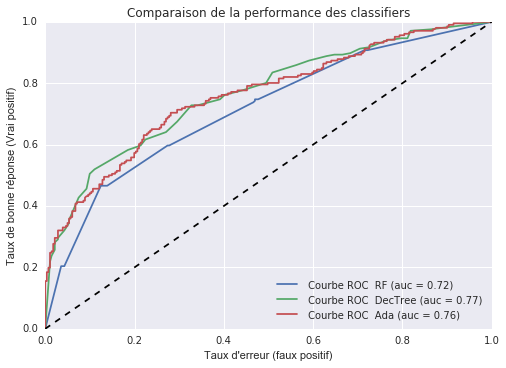

In [103]:
#Comparaison des courbes ROC et AUC
from sklearn.metrics import roc_curve, auc
probasRF = RF.predict_proba(data_test)
probasDec = DecTree.predict_proba(data_test)
probasAda = AdaBoost.predict_proba(data_test)

fpr, tpr, thresholds = roc_curve(y_nutest, probasRF[:, 1])
fpr1, tpr1, thresholds1 = roc_curve(y_nutest, probasDec[:, 1])
fpr2, tpr2, thresholds2 = roc_curve(y_nutest, probasAda[:, 1])
roc_auc = auc(fpr, tpr)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)

plt.plot(fpr, tpr, label=' Courbe ROC  RF (auc = %0.2f)' % roc_auc)
plt.plot(fpr1, tpr1, label=' Courbe ROC  DecTree (auc = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label=' Courbe ROC  Ada (auc = %0.2f)' % roc_auc2)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("Taux d'erreur (faux positif)")
plt.ylabel("Taux de bonne réponse (Vrai positif)")
plt.title('Comparaison de la performance des classifiers')
plt.legend(loc="lower right")

Nous avons confirmation que le DecisionTree et l'AdaBoost ont des meilleurs prédictions. En effet la probabilité que le score d’une bonne réponse soit supérieure au score d’une mauvaise réponse est dans les deux strictement supérieure à 0.76 (cf auc)


#### Limite des deux modèles les plus performants : manque de discrimination

Après avoir mis en valeur par comparaison que l'AdaBoost et le DecisionTree sont les meilleurs classifieurs, nous désirons lire de plus près la distribution du score

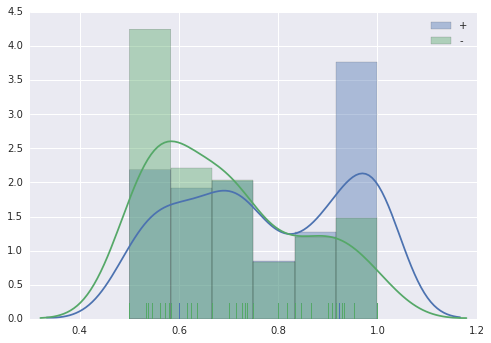

In [77]:
#Distribution des scores du DecisionTree
from sklearn.metrics import auc, precision_recall_curve

y_testn = y_nutest.as_matrix()
y_minD = y_nupredDec.min()

y_scoreD = array( [probasDec[i,p-y_minD] for i,p in enumerate(y_nupredDec)] )
y_scoreD[:5]

positive_scores = y_scoreD[y_testn == y_nupredDec]
negative_scores = y_scoreD[y_testn != y_nupredDec]

fpr = dict()
tpr = dict()
roc_auc = dict()
nb_obs = dict()

for i in DecTree.classes_:
    fpr[i], tpr[i], _ = roc_curve(y_nutest == i, y_scoreD)
    roc_auc[i] = auc(fpr[i], tpr[i])
    nb_obs[i] = (y_nutest == i).sum()

roc_auc, nb_obs

ax = seaborn.distplot(positive_scores, rug=True, hist=True, label="+")
seaborn.distplot(negative_scores, rug=True, hist=True, ax=ax, label="-")
ax.legend()

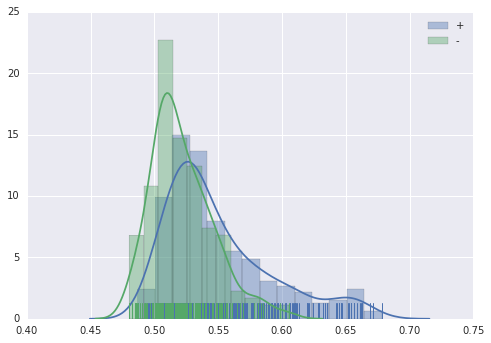

In [78]:
#Distribution des scores de l'AdaBoost

y_testn = y_nutest.as_matrix()
y_minD = y_nupredAda.min()

y_scoreD = array( [probasAda[i,p-y_minD] for i,p in enumerate(y_nupredAda)] )
y_scoreD[:5]

positive_scores = y_scoreD[y_testn == y_nupredAda]
negative_scores = y_scoreD[y_testn != y_nupredAda]

fpr = dict()
tpr = dict()
roc_auc = dict()
nb_obs = dict()

for i in AdaBoost.classes_:
    fpr[i], tpr[i], _ = roc_curve(y_nutest == i, y_scoreD)
    roc_auc[i] = auc(fpr[i], tpr[i])
    nb_obs[i] = (y_nutest == i).sum()

roc_auc, nb_obs

ax = seaborn.distplot(positive_scores, rug=True, hist=True, label="+")
seaborn.distplot(negative_scores, rug=True, hist=True, ax=ax, label="-")
ax.legend()

Le score des deux modèles ne sont pas des plus discriminants puisqu’il existe une aire commune entre les bonnes et les mauvaises réponses plutôt importante. 

Nous allons donc introduire un nouveau modèle, le GradientBoost, en sélectionnant toutefois pour la comparaison le DecisionTree qui a la meilleur performance de prédiction


### Amélioration 5 : apport d'un nouveau modèle et analyse des features

#### Le GradientBoostingClassifier

In [127]:
tic=timeit.default_timer()
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
y_prednuGB = GB.fit(data_train, y_nutrain).predict(data_test)
toc=timeit.default_timer()
toc - tic 

0.2620312930066575

f1nuGB 0.632183908046
f1nuDec 0.622093023256
Area under the ROC curve GradientBoost : 0.793517
Area under the ROC curve DecTree: 0.766679


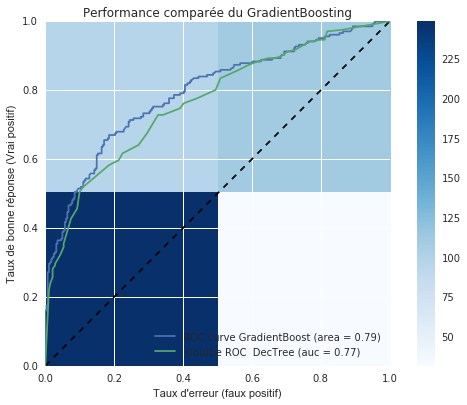

In [128]:
cm = confusion_matrix(y_nutest, y_prednuGB)
plot_confusion_matrix(cm)
f1nuGB = f1_score(y_nutest, y_prednuGB)
print('f1nuGB',f1nuGB)
print('f1nuDec',f1nuDec)  

probasnuGB = GB.predict_proba(data_test)
fpr, tpr, thresholds = roc_curve(y_nutest, probasnuGB[:, 1])
roc_auc = auc(fpr, tpr)
print ("Area under the ROC curve GradientBoost : %f" % roc_auc)
plt.plot(fpr, tpr, label='ROC curve GradientBoost (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
fpr1, tpr1, thresholds1 = roc_curve(y_nutest, probasDec[:, 1])

# ajout pour comparer des informations obtenues avec un DecisionTree
roc_auc1 = auc(fpr1, tpr1)
print ("Area under the ROC curve DecTree: %f" % roc_auc1)
plt.plot(fpr1, tpr1, label=' Courbe ROC  DecTree (auc = %0.2f)' % roc_auc1)

plt.xlabel("Taux d'erreur (faux positif)")
plt.ylabel("Taux de bonne réponse (Vrai positif)")
plt.title('Performance comparée du GradientBoosting')
plt.legend(loc="lower right")

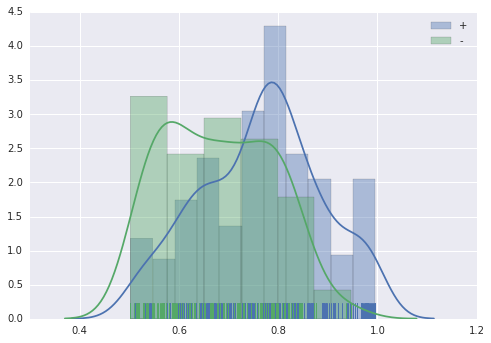

In [133]:
#Distribution des scores de l'AdaBoost

y_testn = y_nutest.as_matrix()
y_minD = y_prednuGB.min()

y_scoreD = array( [probasnuGB[i,p-y_minD] for i,p in enumerate(y_prednuGB)] )
y_scoreD[:5]

positive_scores = y_scoreD[y_testn == y_prednuGB]
negative_scores = y_scoreD[y_testn != y_prednuGB]

fpr = dict()
tpr = dict()
roc_auc = dict()
nb_obs = dict()

for i in GB.classes_:
    fpr[i], tpr[i], _ = roc_curve(y_nutest == i, y_scoreD)
    roc_auc[i] = auc(fpr[i], tpr[i])
    nb_obs[i] = (y_nutest == i).sum()

roc_auc, nb_obs

ax = seaborn.distplot(positive_scores, rug=True, hist=True, label="+")
seaborn.distplot(negative_scores, rug=True, hist=True, ax=ax, label="-")
ax.legend()

Ainsi on observe une nette amélioration de la prédiction. En effet la probabilité que le score d’une bonne réponse soit supérieure au score d’une mauvaise réponse est avec le GradientBoosting quasiment de 80% (cf.AUC). Par ailleurs sa discrimination est plus importante que les deux classifieurs précédents. Cela nous encourage à utiliser cette méthode pour appréhender l'importance relative des composantes, plutôt que les RandomForest par exemple.

#### Importance des features


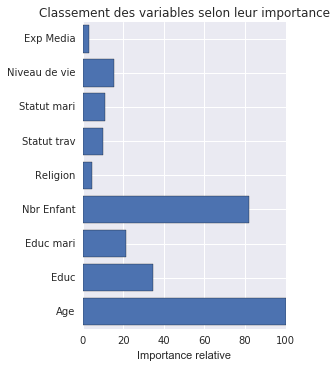

In [81]:
feature_name = list(data.T.index)
limit = 30
feature_importance = GB.feature_importances_[:30]
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance, align='center')
plt.yticks(pos, feature_name)
plt.xlabel('Importance relative')
plt.title("Classement des variables selon leur importance")

Ce graphique met en évidence l'importance de quatre variables dans la prédiction : le nombre d'enfant, l'éducation du mari, l'éducation de la femme, et son âge, variable la plus prégnante.

#### Focus sur la relation entre l'âge et la contraception

On peut donc s'interroger sur la distribution des femmes utilisant une contraception selon leur âge. Pour se faire on  veut représenter un grpah de type "mosaic plot". Il faut donc dans un premier temps discrétiser la variable âge pour rendre le graphique lisible. Dans un deuxième temps pour pouvoir appliquer l'objet "mosaic" il faut considérer le tableau de contingence de ces variables.



In [82]:
#Discrétisation de l'âge
u = df.copy()
u["Age"]= pandas.qcut(u.Age,10)# le choix du nombre de catégories s'est effectuée selon l'allure de l'histogramme préenté au début
# Nous choisission délibérément qcut parce que proche de la distribution initiale du fait la prise en compte des quantiles
u.head()

,Age,Educ,Educ mari,Nbr Enfant,Religion,Statut trav,Statut mari,Niveau de vie,Exp Media,Contraception
0,"(22, 25]",2,3,3,1,1,2,3,0,1
1,"(41, 45]",1,3,10,1,1,3,4,0,1
2,"(41, 45]",2,3,7,1,1,3,4,0,1
3,"(41, 45]",3,2,9,1,1,3,3,0,1
4,"(34, 37]",3,3,8,1,1,3,2,0,1


(<matplotlib.figure.Figure at 0x1b254670>,
 OrderedDict([(('[16, 22]', '1'),
               (0.0, 0.0, 0.11109053878911314, 0.47054722899965135)),
              (('[16, 22]', '2'),
               (0.0,
                0.47385848727779706,
                0.11109053878911314,
                0.098756825839433002)),
              (('[16, 22]', '3'),
               (0.0,
                0.57592657139537573,
                0.11109053878911314,
                0.4240734286046241)),
              (('(22, 25]', '1'),
               (0.11587522778432845,
                0.0,
                0.12018567061980077,
                0.41882942545194196)),
              (('(22, 25]', '2'),
               (0.11587522778432845,
                0.42214068373008767,
                0.12018567061980077,
                0.16645784857705381)),
              (('(22, 25]', '3'),
               (0.11587522778432845,
                0.59190979058528725,
                0.12018567061980077,
                0.40

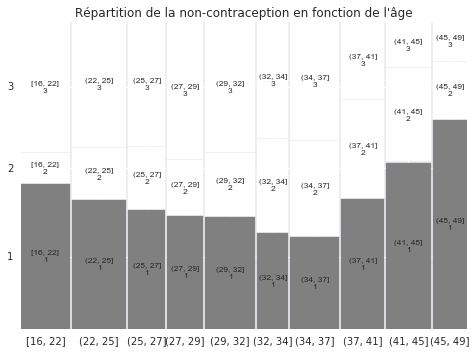

In [83]:
#Application de mosaic
from statsmodels.graphics.mosaicplot import mosaic

temp1 = pandas.crosstab([u.Contraception],[u.Age])

props = lambda key: {'color':'grey' if '1' in key else 'white'}#on met en valeur plus particulièrement le fait 
#d'avoir une contraception vs ne pas en avoir puisque nous avons déjà remarqué que cela avait plus de poids dans nos données

mosaic(temp1.unstack(),properties=props, title="Répartition de la non-contraception en fonction de l'âge" )

# Défaut : 
# 1)je n'arrive pas à me débarasser de ce qui est inscrit à l'intérieur des tiles même avec une lambda function comme labellizer.
# 2)On obtient aussi l'ensemble des coordonnées certes intéressant mais qui alourdisent la lecture

Nous pouvons voir donc qu'il y a clairement une tendance comportementale qui varie avec l'âge : ainsi après 37 ans les femmes déclareraient moins utiliser une contraception.



### Amélioration 6 : réduire le nombre de variables prédictives

L'idée est d'adapter la méthode qui consiste à utiliser une ACP afin de combiner les facteurs pour augmenter la performance, à un modèle avec des variables catégorielles.
Nous allons utiliser une méthode bien plus simple qui est de réduire de le nombre de variables prédictives par la suppression des variables ayant le moins d'importance, mises en évidence par le GradientBoost.

Ainsi cinq variables ont une portée prédictive plus importante que les autres: l'âge, le nombre d'enfant, l'éducation, le niveau de vie et l'éduction du mari.

On choisit de tester ce jeu de données réduit avec à la fois de le DecisionTree et le GradientBoost afin d'avoir une idée de l'effet de ce changement sur la prédiction.

#### Récupération des variables à plus forte valeur prédicitive

In [84]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data_new = SelectKBest(chi2, k=2).fit_transform(data, y)
data_new.shape

(1473, 2)

In [85]:
# Création de datared et des bases d'apprentissages et de test correspondantes
u= data.copy()
datared = u[["Age","Nbr Enfant", "Educ", "Educ mari", "Niveau de vie"]]
datared.head()
datared_train, datared_test, y_nutrain, y_nutest = train_test_split(datared, y_nonuse, test_size=0.33, random_state=42)
print(datared_train.shape)
print(datared_test.shape)
datared.head()

(986, 5)
(487, 5)


,Age,Nbr Enfant,Educ,Educ mari,Niveau de vie
0,24,3,2,3,3
1,45,10,1,3,4
2,43,7,2,3,4
3,42,9,3,2,3
4,36,8,3,3,2


#### DecTree sur modèle réduit

f1nuredDec 0.626780626781
Area under the ROC curve DecTReered : 0.762732
f1nuDec 0.622093023256
Area under the ROC curve DecTree : 0.767517


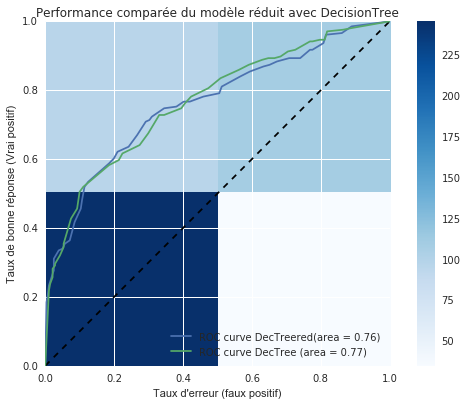

In [86]:
y_prednuredDT = DecTree.fit(datared_train, y_nutrain).predict(datared_test)
cm = confusion_matrix(y_nutest, y_prednuredDT)
plot_confusion_matrix(cm)
f1nuredDT = f1_score(y_nutest, y_prednuredDT)
print('f1nuredDec',f1nuredDT)
probasnuredDT = DecTree.predict_proba(datared_test)
fpr, tpr, thresholds = roc_curve(y_nutest, probasnuredDT[:, 1])
roc_auc = auc(fpr, tpr)
print ("Area under the ROC curve DecTReered : %f" % roc_auc)
plt.plot(fpr, tpr, label='ROC curve DecTreered(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

#Comparaison avec le modèle non réduit
print('f1nuDec',f1nuDec)
fpr1, tpr1, thresholds1 = roc_curve(y_nutest, probasDec[:, 1])
roc_auc1 = auc(fpr1, tpr1)
print ("Area under the ROC curve DecTree : %f" % roc_auc1)
plt.plot(fpr1, tpr1, label='ROC curve DecTree (area = %0.2f)' % roc_auc1)

plt.xlabel("Taux d'erreur (faux positif)")
plt.ylabel("Taux de bonne réponse (Vrai positif)")
plt.title('Performance comparée du modèle réduit avec DecisionTree')
plt.legend(loc="lower right")

#### GradientBoost sur modèle réduit

f1nuredGB 0.64367816092
f1nuGB 0.632183908046
Area under the ROC curve GBred : 0.760089
Area under the ROC curve GB : 0.793517


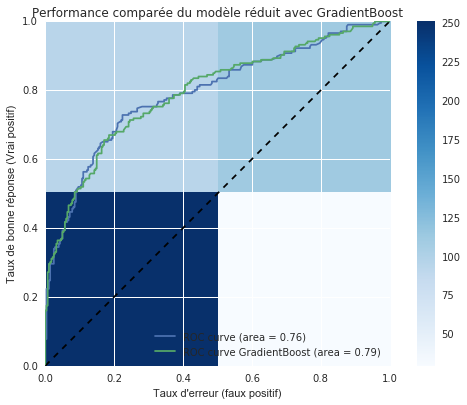

In [134]:
y_prednuredGB = GB.fit(datared_train, y_nutrain).predict(datared_test)
cm = confusion_matrix(y_nutest, y_prednuredGB)
plot_confusion_matrix(cm)
f1nuredGB = f1_score(y_nutest, y_prednuredGB)
print('f1nuredGB',f1nuredGB)
print('f1nuGB',f1nuGB)
probasnuredGB = GB.predict_proba(datared_test)
fpr, tpr, thresholds = roc_curve(y_nutest, probasnuredGB[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print ("Area under the ROC curve GBred : %f" % roc_auc2)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

#Comparaison avec le modèle non réduit

fpr3, tpr3, thresholds3 = roc_curve(y_nutest, probasnuGB[:, 1])
roc_auc3 = auc(fpr3, tpr3)
print ("Area under the ROC curve GB : %f" % roc_auc3)
plt.plot(fpr3, tpr3, label='ROC curve GradientBoost (area = %0.2f)' % roc_auc3)

plt.xlabel("Taux d'erreur (faux positif)")
plt.ylabel("Taux de bonne réponse (Vrai positif)")
plt.title('Performance comparée du modèle réduit avec GradientBoost')
plt.legend(loc="lower right")

Npus avons cet arbitrage peu commun entre l'indicateur AUC et celui du f1_score. En effet si les f1_score s'améliorent avec la réduction du modèle, les auc se détériorent légèrement dans les deux cas.

L'enjeu est donc de savoir quel indcateur correspond le mieux à notre problème de classification. Si en général est préféré la courbe ROC puisqu'elle n'ignore pas les vrais négatifs (en effet le taux d'erreur = 1- spécificité , mesure effectuée sur les faux négatifs) contrairement au f1-score, qui mesure uniquement la sensitivité. Cependant dans notre cadre de raisonnement est-ce que les vrais négatifs sont intéressants? Cela correspond aux femmes ayant un moyen de contraception que l'on considére comme n'en ayant pas. Or nous avons déjà précisé que ce sont plutôt les vrais positifs qui nous intéressent pour des raisons de politiques publiques de diffusion de l'usage de contraceptifs.

Ainsi avec le modèle réduit on prédit mieux le fait de ne pas utiliser de contraception mais on perd sur les vrais négatifs.

## Conclusion


### Vision synthétique du projet

#### Résumé de la démarche

Je tiens à préciser que j'ai pris le parti d'exposer entièrement ma démarche, sans épargner le moindre détail au lecteur, car n'ayant jamais codé, et n'ayant jamais été confrontée à un problème d'apprentissage statistique je voulais vraiment progresser à petits pas, le plus consentieusement. J'ai donc d'abord opté pour une analyse plutôt poussée de ma base de données que j'ai choisi plutôt simple délibérément. J'ai tout de suite heurté une spécificité à laquelle je m'y attendais pas, soit le fait que quasiment toutes mes variables étaient catégorielles, ce qui nuit aux représentations graphiques traditionnelles. Par exemple j'ai mis du temps à coder une alternative à une banale PCA. Mais je ne suis cependant pas entièrement satisfaite de la solution trouvée : je trouve que malheureusement l'ACM représentée est peu lisible.

Pour aborder le problème en tant que tel de l'apprentissage , je souhaitais présenter les premiers modèles vus en classe et essayer d'améliorer leur résultat petit à petit dans différentes direction (soit en changeant les composantes soit en variant les méthodes de classification). J'ai achoppé dans l'introduction de nouveaux modèle sur le fait que je n'ai pas encore une vue panoramique sur les tenants et aboutissants théoriques de la construction des différents classifieurs. L'enchainement visible dans cette présentation du projet a été dictée soit par l'amélioration des indicateurs de performance apportée par chacune des méthodes, soit par la complexification du traitement notamment dans la partie où je cherche à paramétriser au mieux les classifieurs (KNeighbors et RandomForest).



#### Résultats des différents modèles testés

***Première partie : AdaBoost, Gaussian, DecisionTree***: Nous créons dans cette partie une série de modèles de référence que l'on cherchera à améliorer. Nous introduisons par la même occasion la notion de temps d'exécution car le modèle AdaBoost prend significativement plus de temps à être implémenté. Nous éliminons au vu du f1_score le modèle gaussien.

***Deuxième partie: les améliorations***

1. *Discrétisation de toutes les variables explicatives* :  
il s'agit d'une idée qui s'est révélée peu pertinente mais qui montre bien la naïveté avec laquelle j'ai abordé le problème. Je me suis dit que le fait d'avoir plusieurs modalités des variables catégorielles pouvait affaiblir la performance de prédiction. Je me suis trompée, nous aobservons au contraire une perte d'information qui nuit à la prédiction.

- *Caractéristique des individus mal prédits* :  
je me demandais s'il se pouvait que la faiblesse de prédiction des modèles précédement appliqués pouvaient provenir d'une composante spécifique à un certain groupes de femmes. Autrement dit : est-ce que ce sont toujours les mêmes individus qui sont mal prédits ? Cette hypothèse de travail a été démentie par l'analyse.

- *Introduction de deux nouveaux modèles* :  
il s'agissait de se tourner à ce moment de la réflexion vers d'autres modèles pour voir s'ils avaient un plus grand pouvoir de prédiction. J'en profite pour montrer ma dexterité dans l'optimisation d'hyperparamètres ce qui permet d'aborder la question du sur ajustement. Le résultat est encourageant mais pas révolutionnaire. A ce niveau les KNeighbors ont un score un peu plus important que les autres.

- *Binarisation du modèle* :   
l'intuition provient là de l'approche sociétal qu'on peut avoir du problème. En effet un décideur public s'intéressera plus selon non à la variable binaire "utilise un moyen de contraception" vs "n'en n'utilise pas" pour réduire cette deuxième catégorie (surtout vue la prépnodérance de cette modalité dans notre jeu de données). S'agit-il d'un viol de notre projet qui consistait en une classification multi-classe ? En tout cas la performance de chaque modèle augmente. Nous observons là un changement d'adaptation des modèles puisque DecisitionTree et AdaBoost redeviennent les meilleurs méthodes. Nous en profitons pour affiner la comparaison entre les méthodes en introduisant l'analyse des courbes ROC. Nous nous permettons ensuite de discuter de ces résultats en nuancant la pertinence des deux méthodes retenues (AdaBoost et DecisionTree) par leur relativement faible pouvoir de discrimination.  

- *GradientBoosting et importance des composantes* :  
la partie précédente nous a incités à chercher un nouveau modèle: nous choisissont le GradientBoost pour voir un nouveau fonctionnement dans le prolongement de l'AdaBoost. Or les résultats entrainés sur le modèle à une classe a un pouvoir prédictif bien plus important. Nous en profitons donc pour voir de plus près la sortie concernant l'importance relative des variables explicatives. Elle nous met en valeur plus particulièrement quatre variables dont l'âge que nous nous proposons de regarder plus près afin de voir la tendance que le modèle a mis en évidence. La représentation en mosaïque par contre était un peu plus problématique. Nouveau défi!

- *Réduction du nombre de variables prédictives* :  
La fin de la partie précédente nous donne l'idée de simplifier les données de prédiction mais cela se révèle être plus ou moins une erreur, selon que l'on prête plus d'importance au f1_score ou à la courbe ROC. Là la signification de notre projet prend toute son ambiguité. Nous avons considéré que les indicateurs concernant les vrais positifs sont les plus à retenir dans la mesure où c'est cette partie de la population que le planificateur a comme cible pour augmenter la diffusion de la contraception. Dans ce cas il me semble que cela est plus pertinent de retenir le score et donc la méthode du GradientBoosting sur données réduites aux cinq variables suivantes: l'âge, le nombre d'enfant, l'éducation, celle du mari et le niveau de vie.


#### Prolongements concernant notre approche

*Première remarque*:  
J'ai pris le parti de présenter ici que les résultats obtenus sur la binarisation de la variable à prédire. Il aurait fallu pour plus de rigueur avoir une seconde étape de prédiction à l'intérieur du groupe des femmes utilisant un moyen contraceptif. Ce choix a été motivé par le fait que je voulais me concentrer sur le groupe des femmes n'ayant pas de contraception pour des raisons de politiques publiques. J'ai donc aussi par la même occasion simplifier le problème de prédiction.

*Dexième remarque*:  
Nous aurions pu tester d'autres méthodes comme celle des Support Vector Machine mais comme précédemment souligné je n'ai pas encore la maitrise de l'apprentissage statistique pour me rendre compte des différences de procédures entre les méthodes et donc de celles qui corresponderait le mieux avec mon jeu de données. Par ailleurs nous aurions pu lancer un algorithme qui cherche pour nous le meilleur modèle mais cela aurait fausser le projet sans mieux comprendre ce que nous faisions.

*Troisième remarque*:  
J'aurais désiré faire une combinaison de composantes explicatives avec par exemple des indicatrices croisés entre une variable quantitaive (ex:âge) et qualitative (ex: éducation) ou entre deux modalités des variables catégorielles mais en vérité je ne savais pas autrement que par le tatonnement quelle variable il aurait été intéressant d'établir. J'ai donc laissé de côté cette possibilité


### Perspectives : réinscrire le projet dans son contexte

*Le modèle est-il exploitable avec ses performances ?*

Dans la mesure où il s'agit d'un modèle sûrement lié à la volonté de mettre en place une politique de diffusion des moyens de contraception, il me semble peu génant que la prédiction du modèle n'atteigne pas les 100% de bonnes réponses. En effet il est surtout important de relier les composantes socio-démographiques avec la probabilité d'avoir un moyen de contraception afin de pouvoir cibler les actions concrètes. Il est donc toujours mieux d'avoir ce modèle pour guider le pouvoir public sachant que de toute façon les erreurs ne sont pas très dommageables.

*Quel est sa durée de vie ? Ses performances vont-elle se dégrader dans le temps ? Peut-on le détecter ?*

Le modèle tel qu'il est actuellement avec sa paramétrisation n'a pas une durée de vie exceptionnelle dans la mesure où le but de cette étude est justement d'agir sur les données, avec donc  potentiellement un changement dans la façon dont les caractéristiques socio-démographiques influencent le résultat, par exemple avec une nouvelle pondération. Selon cette optique on peut effectuer une mise à jour bayésienne avec l'hypothèse que ce ne sont pas tant les variables qui changent que leur poids relatifs. Vu l'année des données on peut bien entendu détecter la durée de vie du modèle en le testant sur les nouvelles valeurs. En revanche, intrinsèquement au modèle je ne sais pas si on peut détecter sa durée de vie.

*Le modèle peut-il passer à l’échelle et être entraîné sur des jeux 10, 100, 1000 fois plus grand ?*

Sachant que l'on n'a mis de côté l'AdaBoostClassifier qui avait un certzin de temps de calcul, on peut penser que sur des jeux plus grand le modèle retenu fonctionne toujours surtout vu la petitesse de notre échantillon actuel. Il faut par contre que le nombre de modalités de la variable de prédiction n'augmentent pas trop puisque le GradientBoost n'accepte pas un nombre infine de mutliclasse.

*Certaines variables/information sont coûteuses à obtenir, est-il envisageable de faire moins coûteux sans trop de perte de performances ?*

Nous avons déjà répondu à cette question en réduisant le nombre de variable. L'issue du résultat est ambiguë. 

*Si vous deviez vendre ce modèle de machine learning, quel modèle économique choisiez-vous ? (une application, une extension Excel, un service distant payé à chaque prédiction, une application smartphone, le modèle seulement...)*

Cela dépend si je considère que j'ai monté ce projet en tant que service de l'État ou pas. Si oui c'est clairement le modèle en tant que tel qui est intéressant. Il est pour ainsi dire à usage unique: le temps de la mise en place d'une politique publique de diffusion des moyens de contraception.

Par contre il peut donc être intéressant si je considère ne pas appartenir à la fonction publique de mettre en vente uniquement son usage car c'est bien la prédiction discrète qui est intéressante et non une utilisation fréquente du modèle.